# Demonstrate standard major axis (SMA) fitting #

We will compare how two statistical fitting procedures compare to each other in the presence of noise and outliers.
The two methods are Standard Major Axis (SMA) and Ordinary Least Squares (OLS) regression

Steps
1. Generate some synthetic data from a known model
2. Add noise
3. Fit the noisy data with two methods
4. Print and visualize the results

In [10]:
## User-defined variables ##

# Specify true slope and intercept to use
slope_true      = 2
intercept_true  = 1

# standard deviation of noise
# low noise ~ 0.1
# high noise > ~1 
noise_std = 1

# Set whether to add outliers or not
add_outliers = False

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import acgc.figstyle
from acgc.stats import sma

In [12]:
# Create 1000 points with specified slope and intercept
# x is normally distributed
n = 1000
xtrue = 3 + np.random.randn(n) 
ytrue = xtrue * slope_true + intercept_true

In [13]:
# Noisy versions of x and y

# Add noise to x and y
xnoisy = xtrue + np.random.randn(n) * noise_std
ynoisy = ytrue + np.random.randn(n) * noise_std

# Add outliers if requested
if add_outliers:

    # Index location of outliers
    idx = np.random.randint(0,n-1,4)

    # Specify outlier values
    xnoisy[idx] = xnoisy[idx] + 100 * noise_std
    ynoisy[idx] = ynoisy[idx] + 1000 * noise_std

In [14]:
# SMA fit, use robust methods to minimize effect of outliers
sma_result = sma( xnoisy, ynoisy, 
                cl=0.95 )

# Robust SMA
rsma_result = sma( xnoisy, ynoisy, 
                cl=0.95,
                robust=True )
sma_result.keys()

dict_keys(['slope', 'intercept', 'slope_ste', 'intercept_ste', 'slope_interval', 'intercept_interval', 'df_model', 'df_resid', 'params', 'nobs', 'fittedvalues', 'resid'])

In [15]:
# OLS for comparison
ols_result = smf.ols('y ~ x + 1', {'x':xnoisy, 'y':ynoisy} ).fit()

# standard error of fit parameters
ols_ste_params = np.sqrt( np.diag( ols_result.cov_params() ) )

In [16]:
# Print slope and intercept
fmt = '{:15s}{:8.4f}+/-{:8.4f}'

print('\nParameters')
print('True')
print(fmt.format('slope',       slope_true, 0))
print(fmt.format('intercept',   intercept_true, 0))

print('\nOLS')
print(fmt.format('slope',       ols_result.params.iloc[1], ols_ste_params[1] ))
print(fmt.format('intercept',   ols_result.params.iloc[0], ols_ste_params[0] ))

print('\nSMA')
print(fmt.format('slope',       sma_result['slope'],        sma_result['slope_ste']))
print(fmt.format('intercept',   sma_result['intercept'],    sma_result['intercept_ste']))

print('\nRobust SMA')
print(fmt.format('slope',       rsma_result['slope'],        rsma_result['slope_ste']))
print(fmt.format('intercept',   rsma_result['intercept'],    rsma_result['intercept_ste']))


Parameters
True
slope            2.0000+/-  0.0000
intercept        1.0000+/-  0.0000

OLS
slope            1.0610+/-  0.0388
intercept        3.8387+/-  0.1284

SMA
slope            1.6219+/-  0.0388
intercept        2.1693+/-  0.1309

Robust SMA
slope            1.5967+/-  0.0381
intercept        2.2644+/-  0.1280


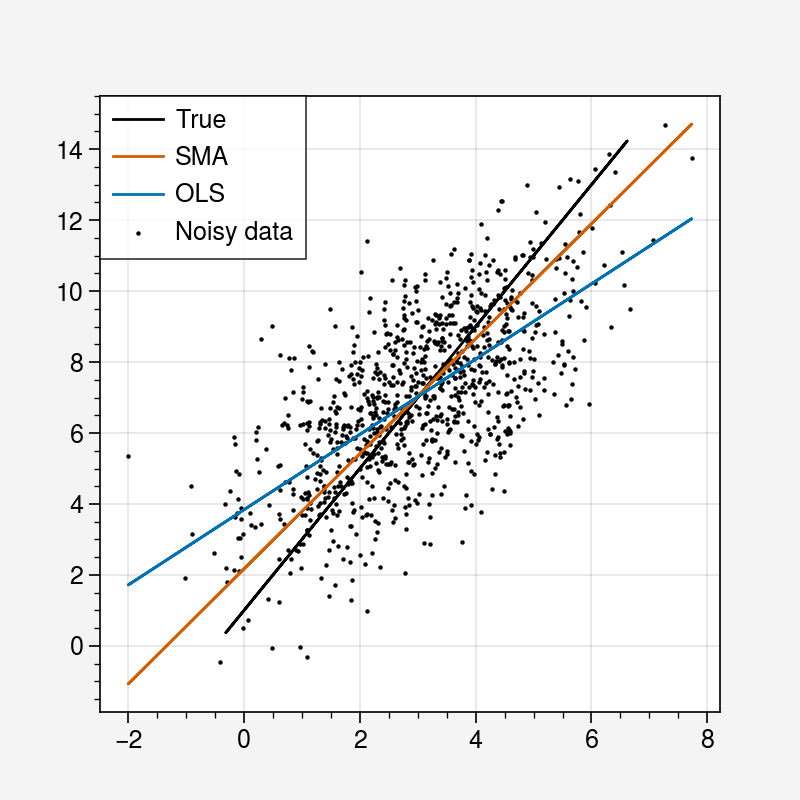

In [17]:
# Plot data & fit lines

# Noisy data
plt.scatter( xnoisy, ynoisy, 
            s=1, color='black', label='Noisy data') 
# True relationship
plt.plot( xtrue, ytrue, 
          color='black', linewidth=1, label='True')

# Fitted relationships
plt.plot( xnoisy, sma_result['slope'] * xnoisy + sma_result['intercept'],
         color='C1', linewidth=1, label='SMA')
plt.plot( xnoisy, ols_result.fittedvalues.values,
         color='C0', linewidth=1, label='OLS')
if add_outliers:
    plt.plot( xnoisy, rsma_result['slope'] * xnoisy + rsma_result['intercept'],
            color='C2', linewidth=1, label='rSMA')

# Legend
plt.legend()